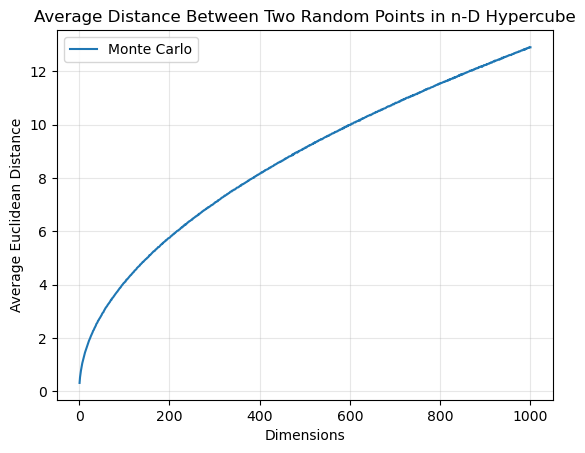

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def average_absolute_difference_1d(n_samples=10):
    """1D case: E[|U1 - U2|] = 1/3 for uniform [0,1]"""
    u1 = np.random.uniform(0, 1, n_samples)
    u2 = np.random.uniform(0, 1, n_samples)
    diff = u1 - u2
    abs_diff = np.abs(diff)
    return {
    'avg_diff': np.mean(diff),  # Cancels to ~0 by symmetry
    'avg_abs_diff': np.mean(abs_diff),  # Converges to 1/3
    'std_diff': np.std(diff)
    }

results_1d = average_absolute_difference_1d()


def average_euclidean_distance_nd(n_dim, n_samples=1000):
    """Monte Carlo estimation of E[||P1 - P2||] in unit hypercube"""
    # Generate n_samples random point pairs in [0,1]^n_dim
    point1 = np.random.uniform(0, 1, (n_samples, n_dim))
    point2 = np.random.uniform(0, 1, (n_samples, n_dim))
    
    # Compute Euclidean norm across all dimensions
    distances = np.linalg.norm(point1 - point2, axis=1)
    return np.mean(distances)


# Compute average distance for dimensions 1 to 1000
avg_distances = []
dimensions = range(1, 1001)

for n in dimensions:
    avg_dist = average_euclidean_distance_nd(n, n_samples=1000)
    avg_distances.append(avg_dist)

# Asymptotic behavior: E[distance] ~ sqrt(n/6) for large n
plt.plot(dimensions, avg_distances, label='Monte Carlo', linewidth=1.5)
plt.xlabel('Dimensions')
plt.ylabel('Average Euclidean Distance')
plt.title('Average Distance Between Two Random Points in n-D Hypercube')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
